In [ ]:
pip install --upgrade setuptools

In [ ]:
pip install pandas

In [ ]:
pip install Bio

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [3]:
import obonet
import pandas as pd

import warnings
import time

from Bio import SeqIO
from Bio.SeqUtils import ProtParam
from Bio.SeqIO.FastaIO import SimpleFastaParser

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def read_fasta(path):
    # will close handle cleanly
    with open(path) as fasta_file:
        identifiers = []
        lengths = []
        for title, sequence in SimpleFastaParser(fasta_file):
            identifiers.append(title.split(None, 1)[0])  # First word is ID
            lengths.append(sequence)

    # converting lists to pandas Series    
    s1 = pd.Series(identifiers, name='protein_id')
    s2 = pd.Series(lengths, name='sequence')

    # gathering Series into a pandas DataFrame and rename index as id column
    Qfasta = pd.DataFrame(dict(protein_id=s1, sequence=s2))

    return Qfasta

In [3]:
obo_path = "C:/Users/ruthc/OneDrive/Desktop/SEMESTER 8/TA II/CAFA5/Train/go-basic.obo"
graph = obonet.read_obo(obo_path)

In [4]:
fasta_path = "C:/Users/ruthc/OneDrive/Desktop/SEMESTER 8/TA II/CAFA5/Train/train_sequences.fasta"
terms_path = "C:/Users/ruthc/OneDrive/Desktop/SEMESTER 8/TA II/CAFA5/Train/train_terms.tsv"
taxonomy_path = "C:/Users/ruthc/OneDrive/Desktop/SEMESTER 8/TA II/CAFA5/Train/train_taxonomy.tsv"

In [ ]:
from Bio import SeqIO

# Path to your fasta file
fasta_path = "C:/Users/ruthc/OneDrive/Desktop/SEMESTER 8/TA II/CAFA5/Train/train_sequences.fasta"

# Read fasta file and calculate average sequence length
total_sequences = 0
total_length = 0

for record in SeqIO.parse(fasta_path, "fasta"):
    total_sequences += 1
    total_length += len(record.seq)

average_length = total_length / total_sequences

print(f"Total sequences: {total_sequences}")
print(f"Total length of all sequences: {total_length}")
print(f"Average sequence length: {average_length:.2f}")

In [5]:
fasta_data = pd.DataFrame([(record.id, str(record.seq)) for record in SeqIO.parse(fasta_path, "fasta")], columns=['Protein_ID', 'Sequence'])

# Read terms data, skipping the first row
terms_data = pd.read_csv(terms_path, sep='\t', header=None, names=['Protein_ID', 'GO_Term_ID', 'Ontology'], skiprows=1)

# Read taxonomy data, skipping the first row
taxonomy_data = pd.read_csv(taxonomy_path, sep='\t', header=None, names=['Protein_ID', 'Taxon_ID'], skiprows=1)

In [6]:
print("Fasta Data:")
display(fasta_data.head())

print("\nTerms Data:")
display(terms_data.head())

print("\nTaxonomy Data:")
display(taxonomy_data.head())

Fasta Data:


,Protein_ID,Sequence
0,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...
1,O73864,MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKL...
2,O95231,MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLP...
3,A0A0B4J1F4,MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEP...
4,P54366,MVETNSPPAGYTLKRSPSDLGEQQQPPRQISRSPGNTAAYHLTTAM...



Terms Data:


,Protein_ID,GO_Term_ID,Ontology
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO
2,A0A009IHW8,GO:0072523,BPO
3,A0A009IHW8,GO:0044270,BPO
4,A0A009IHW8,GO:0006753,BPO



Taxonomy Data:


,Protein_ID,Taxon_ID
0,Q8IXT2,9606
1,Q04418,559292
2,A8DYA3,7227
3,Q9UUI3,284812
4,Q57ZS4,185431


In [33]:
# Huruf-huruf yang tidak termasuk dalam 20 asam amino standar
unusual_amino_acids = {'B', 'J', 'O', 'U', 'X', 'Z'}

# Fungsi untuk memeriksa apakah sekuens mengandung huruf yang tidak biasa
def contains_unusual_amino_acid(sequence):
    return any(aa in unusual_amino_acids for aa in sequence)

# Terapkan fungsi ke kolom 'Sequence' untuk memeriksa sekuens yang mengandung huruf yang tidak biasa
fasta_data['Contains_Unusual_Amino_Acid'] = fasta_data['Sequence'].apply(contains_unusual_amino_acid)

# Filter baris yang mengandung huruf yang tidak biasa
unusual_sequences = fasta_data[fasta_data['Contains_Unusual_Amino_Acid']]

# Tampilkan hasil
print(f"Jumlah sekuens yang mengandung huruf tidak biasa: {len(unusual_sequences)}")
display(unusual_sequences[['Protein_ID', 'Sequence']])

Jumlah sekuens yang mengandung huruf tidak biasa: 1677


,Protein_ID,Sequence
24,Q86KP5,MSLFNLPKVDLGEDCEGGVUARPSSSSSSINNASDESTPLISKTND...
264,O93661,MATEYALRMGDGKRVYLTKEKIVSEIEAGTADAADLGEIPALSANE...
550,Q9JLT4,MVAAMVAALRGPSRRFRPRTRALTRGTRGAASAAGGQQSFDLLVIG...
1730,Q8FDI4,MFDKYRKTLVAGTVAITLGLSASGVMAAGFKPAPPAGQLGAVIVDP...
2285,P11145,MTYEGAIGIDLGTTYSCVGVWQNERVEIIANDQGNRTTPSYVAFTD...
...,...,...
142168,H0YB24,XVLLLSSPGLEELYRCCMLFVDDMAEPRETPEHPLKQIKFLLGRKE...
142176,H0YJP4,XSVAGIVCHVGKAEDREQLVAKALEHCGGVDFLVCSAGVNPLVGST...
142188,F8W2K8,XAQIFQEHPLQRCSAVLVDVRNSSLNSSMDEVTESPLAVTNSSSQE...
142202,I3IT93,XMADAGVRVPMDQVKLAAISDERVDFIREQAFAILRVKTDKWNRFI...


In [34]:
# Define a set of standard amino acids
standard_amino_acids = {'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'}

# Function to clean sequence by removing non-standard amino acids
def clean_sequence(sequence):
    return ''.join([aa for aa in sequence if aa in standard_amino_acids])

# Apply the function to clean sequences
fasta_data['Cleaned_Sequence'] = fasta_data['Sequence'].apply(clean_sequence)

# Display cleaned sequences
print("Cleaned Sequences:")
display(fasta_data[['Protein_ID', 'Sequence', 'Cleaned_Sequence']])

Cleaned Sequences:


,Protein_ID,Sequence,Cleaned_Sequence
0,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...
1,O73864,MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKL...,MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKL...
2,O95231,MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLP...,MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLP...
3,A0A0B4J1F4,MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEP...,MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEP...
4,P54366,MVETNSPPAGYTLKRSPSDLGEQQQPPRQISRSPGNTAAYHLTTAM...,MVETNSPPAGYTLKRSPSDLGEQQQPPRQISRSPGNTAAYHLTTAM...
...,...,...,...
142241,A0A286YAI0,METEVDDFPGKASIFSQVNPLYSNNMKLCEAERYDFQHSEPKTMKS...,METEVDDFPGKASIFSQVNPLYSNNMKLCEAERYDFQHSEPKTMKS...
142242,A0A1D5NUC4,MSAAASAEMIETPPVLNFEEIDYKEIEVEEVVGRGAFGVVCKAKWR...,MSAAASAEMIETPPVLNFEEIDYKEIEVEEVVGRGAFGVVCKAKWR...
142243,Q5RGB0,MADKGPILTSVIIFYLSIGAAIFQILEEPNLNSAVDDYKNKTNNLL...,MADKGPILTSVIIFYLSIGAAIFQILEEPNLNSAVDDYKNKTNNLL...
142244,A0A2R8QMZ5,MGRKKIQITRIMDERNRQVTFTKRKFGLMKKAYELSVLCDCEIALI...,MGRKKIQITRIMDERNRQVTFTKRKFGLMKKAYELSVLCDCEIALI...


In [7]:
import pandas as pd
from collections import Counter

# Define a function to count amino acids in a sequence, excluding non-standard codes
def count_amino_acids(sequence):
    standard_amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    filtered_sequence = ''.join([aa for aa in sequence if aa in standard_amino_acids])
    return Counter(filtered_sequence)

# Apply the function to each sequence in the dataset
fasta_data['Amino_Acid_Counts'] = fasta_data['Sequence'].apply(count_amino_acids)

# Aggregate counts across all sequences
total_counts = Counter()
for counts in fasta_data['Amino_Acid_Counts']:
    total_counts.update(counts)

# Convert the Counter object to a DataFrame for easier analysis
amino_acid_df = pd.DataFrame.from_dict(total_counts, orient='index', columns=['Count'])
amino_acid_df = amino_acid_df.sort_index()

# Calculate the relative frequency of each amino acid
total_amino_acids = amino_acid_df['Count'].sum()
amino_acid_df['Frequency'] = amino_acid_df['Count'] / total_amino_acids

# Display the results
print("Total Counts of Each Amino Acid:")
print(amino_acid_df)

Total Counts of Each Amino Acid:
     Count  Frequency
A  5601393   0.071129
C  1504314   0.019102
D  4151113   0.052713
E  5388873   0.068430
F  2930638   0.037215
G  5061691   0.064276
H  1914456   0.024311
I  3879567   0.049265
K  4594229   0.058340
L  7386109   0.093792
M  1776672   0.022561
N  3400751   0.043184
P  4382337   0.055649
Q  3563728   0.045254
R  4283020   0.054388
S  6493284   0.082455
T  4378528   0.055601
V  4931367   0.062621
W   888449   0.011282
Y  2239153   0.028434


In [37]:
# Set of standard amino acids
standard_amino_acids = {'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'}

# Function to check for non-standard amino acids in a sequence
def contains_unusual_amino_acid(sequence):
    return any(aa not in standard_amino_acids for aa in sequence)

# Apply the function to the cleaned sequences
fasta_data['Contains_Unusual_Amino_Acid'] = fasta_data['Cleaned_Sequence'].apply(contains_unusual_amino_acid)

# Filter rows that still contain unusual amino acids
unusual_sequences_after_cleaning = fasta_data[fasta_data['Contains_Unusual_Amino_Acid']]

# Display results
print(f"Jumlah sekuens yang masih mengandung huruf tidak biasa setelah pembersihan: {len(unusual_sequences_after_cleaning)}")
display(unusual_sequences_after_cleaning[['Protein_ID', 'Sequence', 'Cleaned_Sequence']])

Jumlah sekuens yang masih mengandung huruf tidak biasa setelah pembersihan: 0


,Protein_ID,Sequence,Cleaned_Sequence


Total Counts of Each Amino Acid:
     Count  Frequency
A  5601393   0.071129
C  1504314   0.019102
D  4151113   0.052713
E  5388873   0.068430
F  2930638   0.037215
G  5061691   0.064276
H  1914456   0.024311
I  3879567   0.049265
K  4594229   0.058340
L  7386109   0.093792
M  1776672   0.022561
N  3400751   0.043184
P  4382337   0.055649
Q  3563728   0.045254
R  4283020   0.054388
S  6493284   0.082455
T  4378528   0.055601
V  4931367   0.062621
W   888449   0.011282
Y  2239153   0.028434


C:\Users\ruthc\AppData\Local\Temp\ipykernel_8912\2045224662.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amino_acid_df.index, y=amino_acid_df['Count'], palette="viridis")


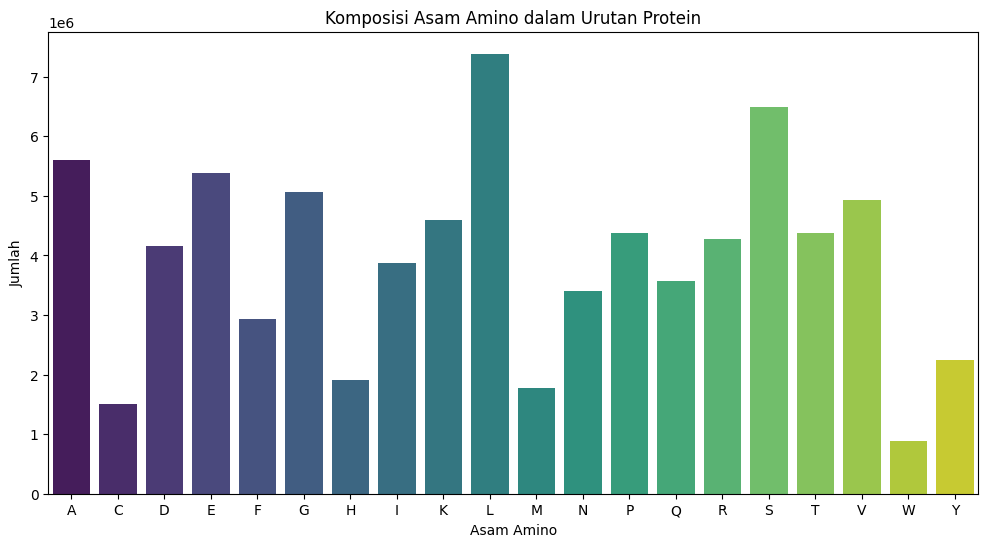

C:\Users\ruthc\AppData\Local\Temp\ipykernel_8912\2045224662.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amino_acid_df.index, y=amino_acid_df['Frequency'], palette="viridis")


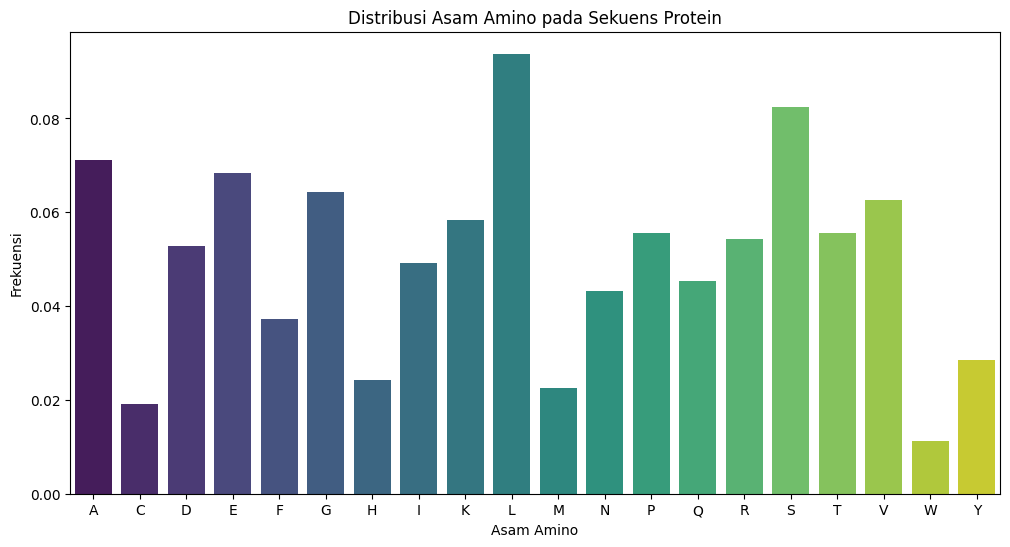

In [8]:
import pandas as pd
from collections import Counter

# Define a function to count amino acids in a sequence, excluding non-standard codes
def count_amino_acids(sequence):
    standard_amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    filtered_sequence = ''.join([aa for aa in sequence if aa in standard_amino_acids])
    return Counter(filtered_sequence)

# Apply the function to each sequence in the dataset
fasta_data['Amino_Acid_Counts'] = fasta_data['Sequence'].apply(count_amino_acids)

# Aggregate counts across all sequences
total_counts = Counter()
for counts in fasta_data['Amino_Acid_Counts']:
    total_counts.update(counts)

# Convert the Counter object to a DataFrame for easier analysis
amino_acid_df = pd.DataFrame.from_dict(total_counts, orient='index', columns=['Count'])
amino_acid_df = amino_acid_df.sort_index()

# Calculate the relative frequency of each amino acid
total_amino_acids = amino_acid_df['Count'].sum()
amino_acid_df['Frequency'] = amino_acid_df['Count'] / total_amino_acids

# Display the results
print("Total Counts of Each Amino Acid:")
print(amino_acid_df)

# Plot the amino acid composition
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=amino_acid_df.index, y=amino_acid_df['Count'], palette="viridis")
plt.title("Komposisi Asam Amino dalam Urutan Protein")
plt.xlabel("Asam Amino")
plt.ylabel("Jumlah")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=amino_acid_df.index, y=amino_acid_df['Frequency'], palette="viridis")
plt.title("Distribusi Asam Amino pada Sekuens Protein")
plt.xlabel("Asam Amino")
plt.ylabel("Frekuensi")
plt.show()

In [38]:
# Filter sequences with length exactly 1200
sequences_length_1200 = fasta_data[fasta_data['Sequence'].apply(len) == 1200]

# Count unique Protein_IDs
count_sequences_length_1200 = sequences_length_1200['Protein_ID'].nunique()

# Display the count
print(f"Jumlah Protein_ID dengan panjang sekuens 1200: {count_sequences_length_1200}")

Jumlah Protein_ID dengan panjang sekuens 1200: 22


In [39]:
# Display the Protein_IDs with sequences of length 1200
print("\nProtein_ID dengan panjang sekuens 1200:")
display(sequences_length_1200[['Protein_ID']])


Protein_ID dengan panjang sekuens 1200:


,Protein_ID
3528,Q09530
4322,Q8BGF7
12230,Q91684
14314,Q9SX33
39410,Q8C419
60675,Q63627
62298,Q03720
62321,Q9EPE9
67285,Q96PN7
71517,P59047


In [40]:
# Filter sequences with length greater than 1200
sequences_length_above_1200 = fasta_data[fasta_data['Sequence'].apply(len) > 1200]

# Count unique Protein_IDs
count_sequences_above_1200 = sequences_length_above_1200['Protein_ID'].nunique()

# Display the count
print(f"Jumlah Protein_ID dengan panjang sekuens lebih dari 1200: {count_sequences_above_1200}")

# Display the Protein_IDs with sequences of length above 1200
print("\nProtein_ID dengan panjang sekuens lebih dari 1200:")
display(sequences_length_above_1200[['Protein_ID']])

Jumlah Protein_ID dengan panjang sekuens lebih dari 1200: 10626

Protein_ID dengan panjang sekuens lebih dari 1200:


,Protein_ID
7,Q16787
9,P13508
16,E7EZG2
44,D3ZEF4
48,F4IAT2
...,...
142203,E7FBD0
142212,F1R4B2
142216,A8DY82
142221,Q9U779


In [41]:
# Pemeriksaan untuk duplikasi Protein_ID
duplicate_protein_ids = fasta_data[fasta_data.duplicated(subset=['Protein_ID'], keep=False)]
print("Protein_ID yang diduplikasi:")
display(duplicate_protein_ids[['Protein_ID']])

# Pemfilteran dengan kondisi yang sesuai
filtered_data = fasta_data[fasta_data['Sequence'].apply(len) > 1200]

# Menghitung jumlah unik Protein_ID setelah pemfilteran
count_filtered_protein_ids = filtered_data['Protein_ID'].nunique()
print(f"Jumlah Protein_ID dengan panjang sekuens lebih dari 1200 setelah pemfilteran: {count_filtered_protein_ids}")

# Menampilkan Protein_ID setelah pemfilteran
print("\nProtein_ID dengan panjang sekuens lebih dari 1200:")
display(filtered_data[['Protein_ID']])

Protein_ID yang diduplikasi:


,Protein_ID


Jumlah Protein_ID dengan panjang sekuens lebih dari 1200 setelah pemfilteran: 10626

Protein_ID dengan panjang sekuens lebih dari 1200:


,Protein_ID
7,Q16787
9,P13508
16,E7EZG2
44,D3ZEF4
48,F4IAT2
...,...
142203,E7FBD0
142212,F1R4B2
142216,A8DY82
142221,Q9U779


In [43]:
# Filter sequences with length less than 1200
sequences_length_below_1200 = fasta_data[fasta_data['Sequence'].apply(len) < 1200]

# Count unique Protein_IDs
count_sequences_below_1200 = sequences_length_below_1200['Protein_ID'].nunique()

# Display the count
print(f"Jumlah Protein_ID dengan jumlah sekuens kurang dari 1200: {count_sequences_below_1200}")

# Display the Protein_IDs with sequences of length below 1200
print("\nProtein_ID dengan jumlah sekuens kurang dari 1200:")
display(sequences_length_below_1200[['Protein_ID']])

Jumlah Protein_ID dengan jumlah sekuens kurang dari 1200: 131598

Protein_ID dengan jumlah sekuens kurang dari 1200:


,Protein_ID
0,P20536
1,O73864
2,O95231
3,A0A0B4J1F4
4,P54366
...,...
142241,A0A286YAI0
142242,A0A1D5NUC4
142243,Q5RGB0
142244,A0A2R8QMZ5


In [44]:
# Filter sequences with length less than or equal to 1200
sequences_length_at_most_1200 = fasta_data[fasta_data['Sequence'].apply(len) <= 1200]

# Count unique Protein_IDs
count_sequences_at_most_1200 = sequences_length_at_most_1200['Protein_ID'].nunique()

# Display the count
print(f"Jumlah Protein_ID dengan jumlah sekuens kurang dari atau sama dengan 1200: {count_sequences_at_most_1200}")

# Display the Protein_IDs with sequences of length at most 1200
print("\nProtein_ID dengan jumlah sekuens kurang dari atau sama dengan 1200:")
display(sequences_length_at_most_1200[['Protein_ID']])

Jumlah Protein_ID dengan jumlah sekuens kurang dari atau sama dengan 1200: 131620

Protein_ID dengan jumlah sekuens kurang dari atau sama dengan 1200:


,Protein_ID
0,P20536
1,O73864
2,O95231
3,A0A0B4J1F4
4,P54366
...,...
142241,A0A286YAI0
142242,A0A1D5NUC4
142243,Q5RGB0
142244,A0A2R8QMZ5


In [42]:
# Menghitung jumlah unik Protein_ID
total_protein_ids = fasta_data['Protein_ID'].nunique()

# Menampilkan jumlah total Protein_ID
print(f"Jumlah total Protein_ID: {total_protein_ids}")

Jumlah total Protein_ID: 142246


In [32]:
# Sum the frequencies to check if they equal 1
frequency_sum = amino_acid_df['Frequency'].sum()
print(f"Sum of all frequencies: {frequency_sum}")

Sum of all frequencies: 0.9999999999999999


In [7]:
import pandas as pd

# Path to the terms data file
terms_path = "C:/Users/ruthc/OneDrive/Desktop/SEMESTER 8/TA II/Eksperimen TAII/Train/train_terms.tsv"

# Read the terms data, skipping the first row
terms_data = pd.read_csv(terms_path, sep='/t', header=None, names=['Entry_ID', 'GO_Term_ID', 'Ontology'], skiprows=1)

# Filter the data for Protein_ID Q9CQV8
filtered_data = terms_data[terms_data['Entry_ID'] == 'Q9CQV8']

# Display the filtered data
print("/nFiltered Data:")
display(filtered_data)

C:\Users\ruthc\AppData\Local\Temp\ipykernel_25028\1995131417.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  terms_data = pd.read_csv(terms_path, sep='/t', header=None, names=['Entry_ID', 'GO_Term_ID', 'Ontology'], skiprows=1)


/nFiltered Data:


,Entry_ID,GO_Term_ID,Ontology


In [ ]:
import pandas as pd

# Path to the terms data file
terms_path = "D:/Artefak TASI-2324-101/Kode Implementasi TA/Train/train_terms.tsv"

# Read the terms data, skipping the first row
terms_data = pd.read_csv(terms_path, sep='\t', header=None, names=['Entry_ID', 'GO_Term_ID', 'Ontology'], skiprows=1)

# Check for the presence of the Protein_ID 'Q9CQV8'
protein_id = 'Q9CQV8'
if protein_id in terms_data['Entry_ID'].values:
    # Filter the data for Protein_ID Q9CQV8
    filtered_data = terms_data[terms_data['Entry_ID'] == protein_id]

    # Display the filtered data
    print(f"\nFiltered Data for Protein_ID {protein_id}:")
    display(filtered_data)
else:
    print(f"\nProtein_ID {protein_id} not found in the data.")



Filtered Data for Protein_ID P62259:


,Entry_ID,GO_Term_ID,Ontology
1583252,P62259,GO:0021766,BPO
1583253,P62259,GO:0048869,BPO
1583254,P62259,GO:0051641,BPO
1583255,P62259,GO:0048856,BPO
1583256,P62259,GO:0051172,BPO
...,...,...,...
4992747,P62259,GO:0019899,MFO
4992748,P62259,GO:0019902,MFO
4992749,P62259,GO:0003674,MFO
4992750,P62259,GO:0005515,MFO


Data Train

In [ ]:
fasta_data.describe()

In [ ]:
fasta_data.nunique()

In [ ]:
terms_data.describe()

In [ ]:
terms_data.nunique()

In [ ]:
import pandas as pd

# Asumsikan merged_data adalah DataFrame yang sudah ada
# Tambahkan kolom baru untuk panjang sekuens jika belum ada
fasta_data['Sequence_Length'] = fasta_data['Sequence'].apply(len)

# Menggunakan describe()
summary_stats = fasta_data['Sequence_Length'].describe()
print("Ringkasan Statistik:")
print(summary_stats)

# Menggunakan quantile()
quantiles = fasta_data['Sequence_Length'].quantile([0.25, 0.50, 0.75])
print("\nPersentil 25%, 50%, dan 75%:")
print(quantiles)

In [ ]:
import pandas as pd
from collections import Counter

# Define a function to count amino acids in a sequence
def count_amino_acids(sequence):
    return Counter(sequence)

# Apply the function to each sequence in the dataset
fasta_data['Amino_Acid_Counts'] = fasta_data['Sequence'].apply(count_amino_acids)

# Aggregate counts across all sequences
total_counts = Counter()
for counts in fasta_data['Amino_Acid_Counts']:
    total_counts.update(counts)

# Convert the Counter object to a DataFrame for easier analysis
amino_acid_df = pd.DataFrame.from_dict(total_counts, orient='index', columns=['Count'])
amino_acid_df = amino_acid_df.sort_index()

# Calculate the relative frequency of each amino acid
total_amino_acids = amino_acid_df['Count'].sum()
amino_acid_df['Frequency'] = amino_acid_df['Count'] / total_amino_acids

# Display the results
print("Total Counts of Each Amino Acid:")
print(amino_acid_df)

In [ ]:
import pandas as pd
from collections import Counter

# Define a function to count amino acids in a sequence, excluding non-standard codes
def count_amino_acids(sequence):
    standard_amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    filtered_sequence = ''.join([aa for aa in sequence if aa in standard_amino_acids])
    return Counter(filtered_sequence)

# Apply the function to each sequence in the dataset
fasta_data['Amino_Acid_Counts'] = fasta_data['Sequence'].apply(count_amino_acids)

# Aggregate counts across all sequences
total_counts = Counter()
for counts in fasta_data['Amino_Acid_Counts']:
    total_counts.update(counts)

# Convert the Counter object to a DataFrame for easier analysis
amino_acid_df = pd.DataFrame.from_dict(total_counts, orient='index', columns=['Count'])
amino_acid_df = amino_acid_df.sort_index()

# Calculate the relative frequency of each amino acid
total_amino_acids = amino_acid_df['Count'].sum()
amino_acid_df['Frequency'] = amino_acid_df['Count'] / total_amino_acids

# Display the results
print("Total Counts of Each Amino Acid:")
print(amino_acid_df)

In [ ]:
import pandas as pd

# Asumsikan merged_data adalah DataFrame yang sudah ada dan memiliki kolom 'Sequence'
# Tambahkan kolom baru untuk panjang sekuens jika belum ada
fasta_data['Sequence_Length'] = fasta_data['Sequence'].apply(len)

# Hitung total panjang semua sekuens
total_length = fasta_data['Sequence_Length'].sum()

# Hitung jumlah sekuens
total_sequences = fasta_data['Sequence_Length'].count()

# Hitung rata-rata panjang sekuens
mean_length = total_length / total_sequences

# Tampilkan hasil
print(f"Total panjang semua sekuens: {total_length}")
print(f"Jumlah sekuens: {total_sequences}")
print(f"Rata-rata panjang sekuens: {mean_length}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan merged_data adalah DataFrame yang sudah ada dan memiliki kolom 'Sequence'
# Tambahkan kolom baru untuk panjang sekuens jika belum ada
fasta_data['Sequence_Length'] = fasta_data['Sequence'].apply(len)

# Mengatur ukuran plot
plt.figure(figsize=(12, 6))

# Membuat histogram distribusi panjang sekuens
plt.subplot(1, 2, 1)
sns.histplot(fasta_data['Sequence_Length'], bins=50, kde=True)
plt.title('Histogram Distribusi Panjang Sekuens')
plt.xlabel('Panjang Sekuens')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Misalkan merged_data adalah DataFrame yang sudah ada dan memiliki kolom 'Sequence_Length'
percentiles = fasta_data['Sequence_Length'].quantile([0.25, 0.5, 0.75, 0.9, 0.95])
print(percentiles)

In [ ]:
padding_length = percentiles[0.95]
print(f"Panjang padding yang optimal berdasarkan persentil ke-95: {padding_length}")

TEST DATA

In [ ]:
fasta_target_path = "C:/Users/ruthc/OneDrive/Desktop/SEMESTER 8/TA II/CAFA5/Test (Targets)/testsuperset.fasta"

In [ ]:
fasta_target_path = pd.DataFrame([(record.id, str(record.seq)) for record in SeqIO.parse(fasta_target_path, "fasta")], columns=['Protein_ID', 'Sequence'])

In [ ]:
print("Fasta Data:")
display(fasta_target_path.head())

In [ ]:
fasta_target_path.describe()

In [ ]:
fasta_target_path.nunique()

In [ ]:
import pandas as pd

# Asumsikan merged_data adalah DataFrame yang sudah ada
# Tambahkan kolom baru untuk panjang sekuens jika belum ada
fasta_target_path['Sequence_Length'] = fasta_target_path['Sequence'].apply(len)

# Menggunakan describe()
summary_stats = fasta_target_path['Sequence_Length'].describe()
print("Ringkasan Statistik:")
print(summary_stats)

# Menggunakan quantile()
quantiles = fasta_target_path['Sequence_Length'].quantile([0.25, 0.50, 0.75])
print("\nPersentil 25%, 50%, dan 75%:")
print(quantiles)

Gabungan data

In [ ]:
merged_data = pd.merge(fasta_data, terms_data, on='Protein_ID')

In [ ]:
merged_data

In [ ]:
merged_data.nunique()

In [ ]:
merged_data.describe()

In [ ]:
import pandas as pd

# Asumsikan merged_data adalah DataFrame yang sudah ada
merged_data['Sequence_Length'] = merged_data['Sequence'].apply(len)

# Tampilkan DataFrame dengan kolom panjang sekuens
print(merged_data[['Sequence', 'Sequence_Length']])

In [ ]:
import pandas as pd

# Asumsikan merged_data adalah DataFrame yang sudah ada
merged_data['Sequence_Length'] = merged_data['Sequence'].apply(len)

# Temukan panjang sekuens maksimum
max_length = merged_data['Sequence_Length'].max()

# Temukan baris dengan panjang sekuens maksimum
longest_sequence = merged_data[merged_data['Sequence_Length'] == max_length]

# Tampilkan sekuens terpanjang
print(longest_sequence[['Sequence', 'Sequence_Length']])

In [ ]:
import pandas as pd

# Asumsikan merged_data adalah DataFrame yang sudah ada
merged_data['Sequence_Length'] = merged_data['Sequence'].apply(len)

# Hitung jumlah panjang semua sekuens
total_length = merged_data['Sequence_Length'].sum()

# Tampilkan hasil
print(f'Total panjang semua sekuens protein: {total_length}')

In [ ]:
import pandas as pd

# Asumsikan merged_data adalah DataFrame yang sudah ada
merged_data['Sequence_Length'] = merged_data['Sequence'].apply(len)

# Hitung standar deviasi panjang semua sekuens
std_length = merged_data['Sequence_Length'].std()

# Tampilkan hasil
print(f'Standar deviasi panjang semua sekuens protein: {std_length}')

In [ ]:
import pandas as pd

# Asumsikan merged_data adalah DataFrame yang sudah ada
merged_data['Sequence_Length'] = merged_data['Sequence'].apply(len)

# Hitung nilai minimum panjang semua sekuens
min_length = merged_data['Sequence_Length'].min()

# Tampilkan hasil
print(f'Nilai minimum panjang semua sekuens protein: {min_length}')

In [ ]:
import pandas as pd

# Asumsikan merged_data adalah DataFrame yang sudah ada
# Tambahkan kolom baru untuk panjang sekuens jika belum ada
merged_data['Sequence_Length'] = merged_data['Sequence'].apply(len)

# Menggunakan describe()
summary_stats = merged_data['Sequence_Length'].describe()
print("Ringkasan Statistik:")
print(summary_stats)

# Menggunakan quantile()
quantiles = merged_data['Sequence_Length'].quantile([0.25, 0.50, 0.75])
print("\nPersentil 25%, 50%, dan 75%:")
print(quantiles)

In [ ]:
import pandas as pd

# Asumsikan merged_data adalah DataFrame yang sudah ada
merged_data['Sequence_Length'] = merged_data['Sequence'].apply(len)

# Hitung rata-rata panjang sekuens
average_length = merged_data['Sequence_Length'].mean()

# Tampilkan hasil
print(f"Rata-rata panjang sekuens dalam dataset adalah: {average_length}")

DATA PKL

In [ ]:
import pickle

In [ ]:
with open('D:/TASI-101/CAFA5/trainCAFA5.pkl', 'rb') as f:
    data1 = pickle.load(f)

In [ ]:
data1

In [ ]:
data1.nunique()

In [ ]:
with open('D:/TASI-101/CAFA5/termsCAFA5.pkl', 'rb') as f:
    data2 = pickle.load(f)

In [ ]:
data2

In [ ]:
data2.nunique()

In [ ]:
with open('D:/TASI-101/CAFA5/testCAFA5.pkl', 'rb') as f:
    data3 = pickle.load(f)

In [ ]:
data3

In [ ]:
data3.nunique()

OBO File

In [ ]:
obo_path = 'D:/TASI-101/CAFA5/cafa-5-protein-function-prediction/Train/go-basic.obo'
graph = obonet.read_obo(obo_path)

In [ ]:
# Menampilkan informasi singkat tentang graf
print("Informasi tentang graf:")
print(f"Jumlah node: {len(graph.nodes)}")
print(f"Jumlah edge: {len(graph.edges)}")
print()

# Menampilkan beberapa contoh node
print("Contoh beberapa node:")
for node, data in graph.nodes(data=True):
    if "name" in data:
        print(f"ID: {node}, Name: {data['name']}")
print()

# Menampilkan beberapa contoh edge
print("Contoh beberapa edge:")
for source, target, data in graph.edges(data=True):
    if "relationship" in data:
        print(f"Source: {source}, Target: {target}, Relationship: {data['relationship']}")

In [ ]:
with open('C:/Users/ruthc/OneDrive/Desktop/SEMESTER 8/TA II/PredictionFunction_Protein_Using LSTM(1)/PredictionFunction_Protein_Using LSTM/data/swissprot.pkl', 'rb') as f:
    dataswisprot = pickle.load(f)

In [ ]:
dataswisprot

In [ ]:
import pickle
import pandas as pd

# Membaca file pickle
with open('C:/Users/ruthc/OneDrive/Desktop/SEMESTER 8/TA II/PredictionFunction_Protein_Using LSTM(1)/PredictionFunction_Protein_Using LSTM/data/swissprot.pkl', 'rb') as f:
    dataswisprot = pickle.load(f)

# Memeriksa apakah data adalah DataFrame
if isinstance(dataswisprot, pd.DataFrame):
    # Mencari baris dengan accession 'Q9CQV8'
    result = dataswisprot[dataswisprot['proteins'] == '1433B_MOUSE']
    
    if not result.empty:
        display(result)
    else:
        print(f"Data dengan accession 'Q9CQV8' tidak ditemukan.")
else:
    print("Data yang dimuat bukan DataFrame.")

In [ ]:
import pickle
import pandas as pd

# Membaca file pickle
with open('C:/Users/ruthc/OneDrive/Desktop/SEMESTER 8/TA II/PredictionFunction_Protein_Using LSTM(1)/PredictionFunction_Protein_Using LSTM/data/swissprot.pkl', 'rb') as f:
    dataswisprot = pickle.load(f)

# Memeriksa apakah data adalah DataFrame
if isinstance(dataswisprot, pd.DataFrame):
    # Mencari baris dengan accession 'Q9CQV8'
    result = dataswisprot[dataswisprot['accessions'].str.contains('Q9CQV8')]
    
    if not result.empty:
        # Menampilkan semua GO annotations
        annotations = result.iloc[0]['annotations']
        exp_annotations = result.iloc[0]['exp_annotations']
        prop_annotations = result.iloc[0]['prop_annotations']
        
        display("Annotations:", annotations)
        display("Experimental Annotations:", exp_annotations)
        display("Predicted Annotations:", prop_annotations)
    else:
        print(f"Data dengan accession 'Q9CQV8' tidak ditemukan.")
else:
    print("Data yang dimuat bukan DataFrame.")

In [ ]:
import pickle
import pandas as pd

# Membaca file pickle
with open('C:/Users/ruthc/OneDrive/Desktop/SEMESTER 8/TA II/PredictionFunction_Protein_Using LSTM(1)/PredictionFunction_Protein_Using LSTM/data/swissprot.pkl', 'rb') as f:
    dataswisprot = pickle.load(f)

# Memeriksa apakah data adalah DataFrame
if isinstance(dataswisprot, pd.DataFrame):
    # Mencari baris dengan accession 'Q9CQV8'
    result = dataswisprot[dataswisprot['accessions'].str.contains('P35213')]
    
    if not result.empty:
        # Menampilkan semua GO annotations
        annotations = result.iloc[0]['annotations']
        exp_annotations = result.iloc[0]['exp_annotations']
        prop_annotations = result.iloc[0]['prop_annotations']
        
        display("Annotations:", annotations)
        display("Experimental Annotations:", exp_annotations)
        display("Predicted Annotations:", prop_annotations)
    else:
        print(f"Data dengan accession 'P35213' tidak ditemukan.")
else:
    print("Data yang dimuat bukan DataFrame.")